In [2]:
import UWGeodynamics as GEO

loaded rc file /opt/UWGeodynamics/UWGeodynamics/uwgeo-data/uwgeodynamicsrc


In [3]:
u = GEO.UnitRegistry

In [4]:
velocity = 2.5 * u.centimeter / u.hour
model_length = 20. * u.centimeter
bodyforce = 1560 * u.kilogram / u.metre**3 * 9.81 * u.meter / u.second**2

KL = model_length
Kt = KL / velocity
KM = bodyforce * KL**2 * Kt**2

GEO.scaling_coefficients["[length]"] = KL
GEO.scaling_coefficients["[time]"] = Kt
GEO.scaling_coefficients["[mass]"]= KM

In [5]:
Model = GEO.Model(elementRes=(200, 50), 
                  minCoord=(0. * u.centimeter, -3.5 * u.centimeter), 
                  maxCoord=(20. * u.centimeter, 1.5 * u.centimeter), 
                  gravity=(0.0, -9.81 * u.meter / u.second**2))

In [6]:
Model.outputDir="outputs_tutorial3"

In [7]:
Model.add_visugrid(elementRes=(100, 25), 
                   minCoord=(0. * u.centimeter, -3.5 * u.centimeter), 
                   maxCoord=(20. * u.centimeter, 0.0 * u.centimeter))

In [8]:
air = Model.add_material(name="Air", shape=GEO.shapes.Layer2D(top=Model.top, bottom=Model.bottom))
sand1 = Model.add_material(name="Sand1", shape=GEO.shapes.Layer2D(top=0.*u.centimeter, bottom=Model.bottom))
sand2 = Model.add_material(name="Sand2", shape=GEO.shapes.Layer2D(top=-1. * u.centimeter, bottom=-2. * u.centimeter))

vertices = [( 5.* u.centimeter, -3.0 * u.centimeter),
            (15.* u.centimeter, -3.0 * u.centimeter),
            (15.* u.centimeter, -3.5 * u.centimeter),
            ( 5.* u.centimeter, -3.5 * u.centimeter)]

silicon = Model.add_material(name="Silicon", shape=GEO.shapes.Polygon(vertices))


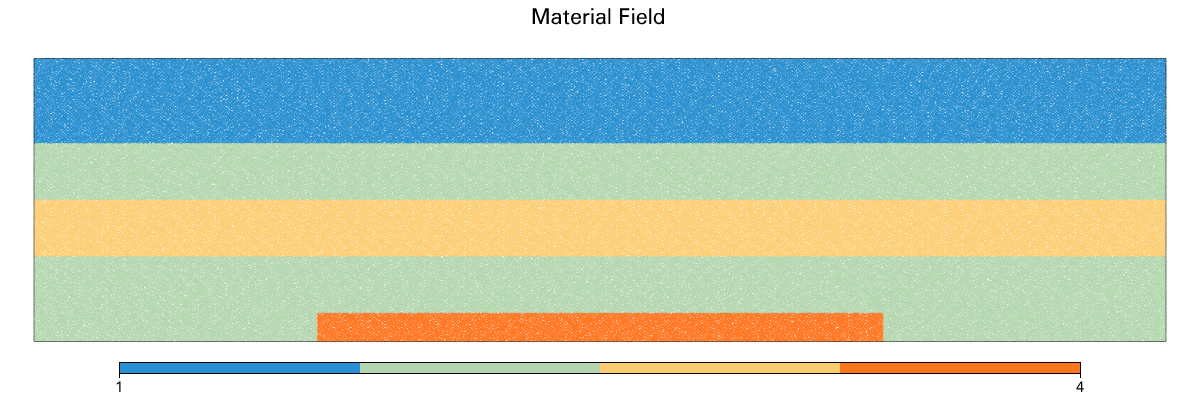

In [9]:
Fig = Model.plot.material(figsize=(1200,400), fn_size=2.0)

In [10]:
import numpy as np

x = np.linspace(Model.minCoord[0], Model.maxCoord[0], 1000) * u.centimeter
interface1 = GEO.nd(sand1.top)
interface2 = GEO.nd(sand2.top)
interface3 = GEO.nd(sand2.bottom)

interface1 = Model.add_passive_tracers(name="Interface1", vertices=[x, interface1])
interface2 = Model.add_passive_tracers(name="Interface2", vertices=[x, interface2])
interface3 = Model.add_passive_tracers(name="Interface3", vertices=[x, interface3])


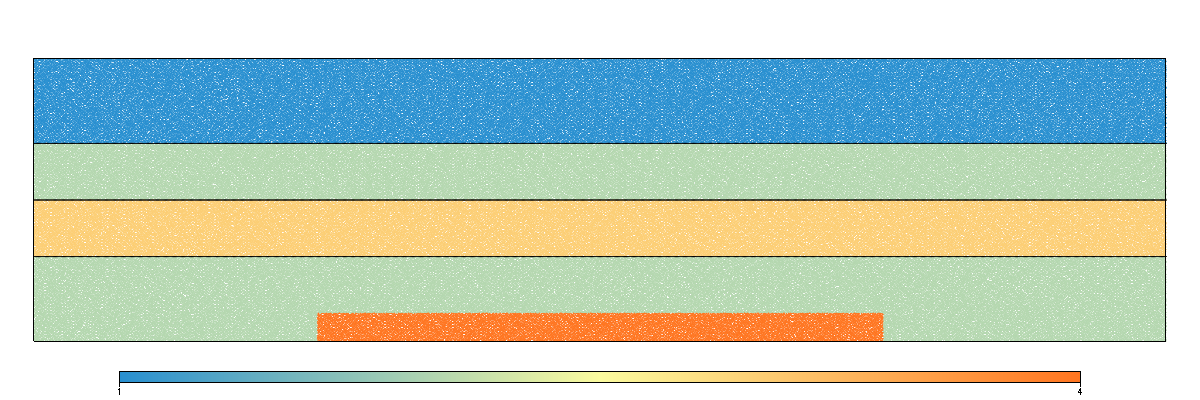

In [11]:
import glucifer
Fig = glucifer.Figure(figsize=(1200,400))
Fig.Points(interface1.swarm, pointSize=2.0)
Fig.Points(interface2.swarm, pointSize=2.0)
Fig.Points(interface3.swarm, pointSize=2.0)
Fig.Points(Model.swarm, Model.materialField, fn_size=2.0)
Fig.show()

In [12]:
air.density = 10. * u.kilogram / u.metre**3
sand1.density = 1560. * u.kilogram / u.metre**3
sand2.density = 1560. * u.kilogram / u.metre**3
silicon.density = 965. * u.kilogram / u.metre**3

In [13]:
# Assign function to materials
air.viscosity     = GEO.ConstantViscosity(1.0e2  * u.pascal * u.second)
sand1.viscosity   = GEO.ConstantViscosity(1.0e13 * u.pascal * u.second)
sand2.viscosity   = GEO.ConstantViscosity(1.0e13 * u.pascal * u.second)
silicon.viscosity = GEO.ConstantViscosity(5.0e4  * u.pascal * u.second)

In [14]:
sandPlasticity = GEO.DruckerPrager(cohesion=10. * u.pascal,
                                     cohesionAfterSoftening=10. * u.pascal,
                                     frictionCoefficient=0.73,
                                     frictionAfterSoftening=0.60,
                                     minimumViscosity=1.0e2  * u.pascal * u.second)

In [15]:
sand1.plasticity = sandPlasticity
sand2.plasticity = sandPlasticity

In [16]:
conditions = [(Model.x > GEO.nd(10.1 * u.centimetre), GEO.nd(2.5 * u.centimeter / u.hour)),
              (Model.x > GEO.nd(9.9 * u.centimetre), (Model.x - GEO.nd(9.9 * u.centimetre)) * GEO.nd(velocity) / GEO.nd(0.2 * u.centimetre)),
              (True, 0.0)]

Model.set_velocityBCs(left=[0 * u.centimeter / u.hour, None],
                      right=[2.5 * u.centimeter / u.hour, None],
                      bottom=[conditions, 0.0])

In [17]:
Model.minViscosity = 1.0e2 * u.pascal * u.second
Model.maxViscosity = 1.0e9 * u.pascal * u.second

In [18]:
Model.init_model()


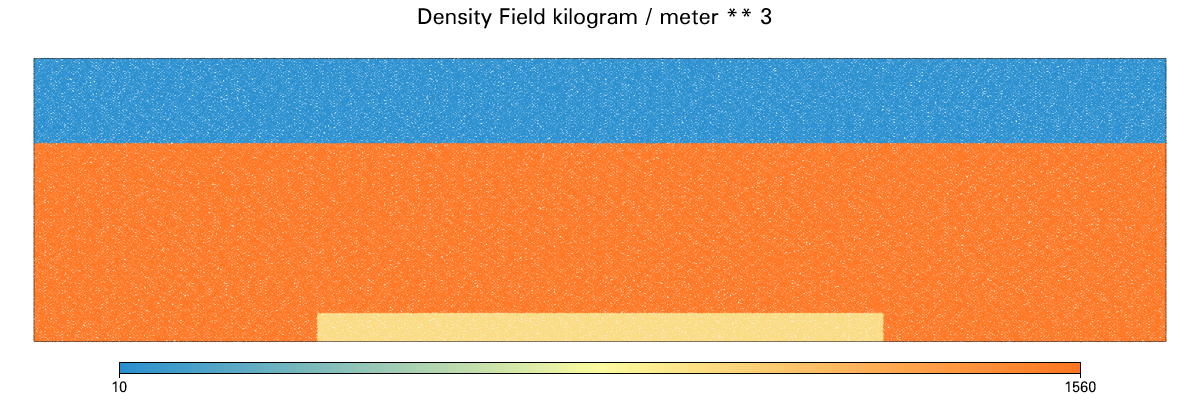

In [19]:
Fig = Model.plot.density(figsize=(1200,400), fn_size=2.)


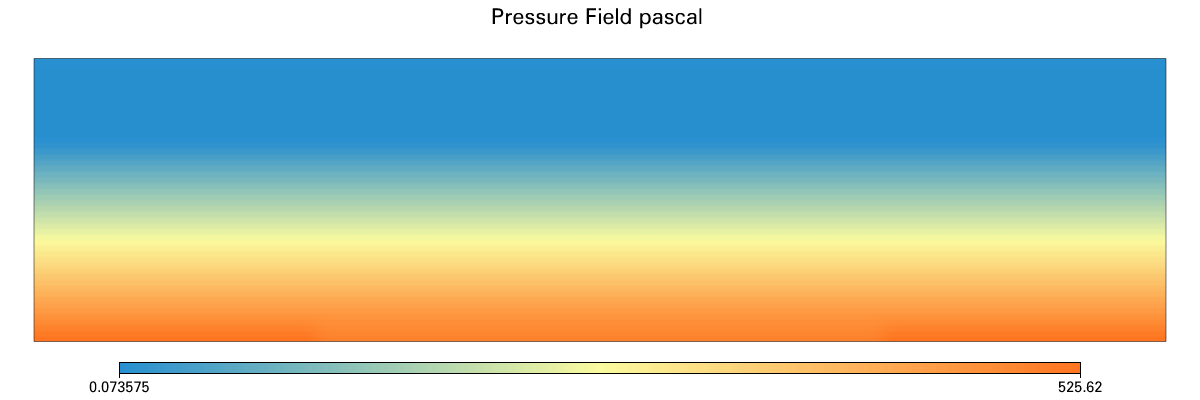

In [20]:
Fig = Model.plot.pressureField(onMesh=False, figsize=(1200,400), fn_size=2.)


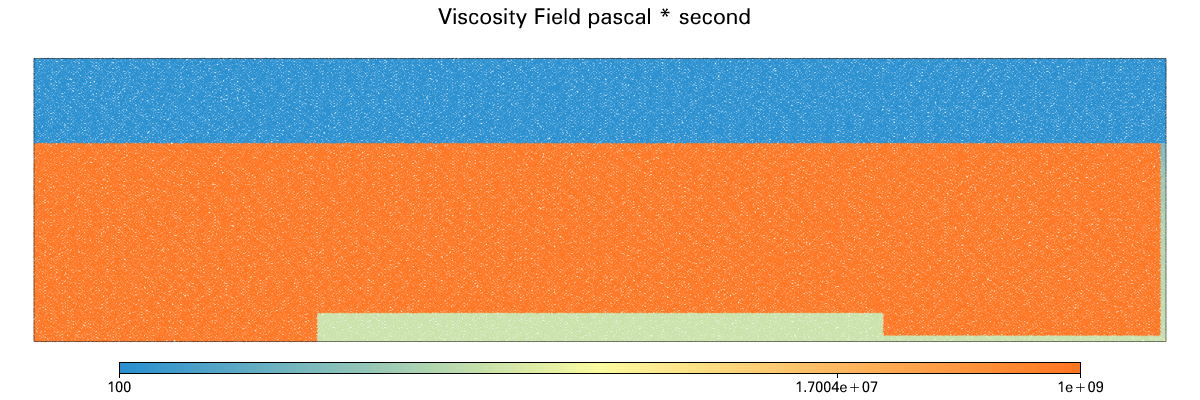

In [21]:
Fig = Model.plot.viscosity(figsize=(1200,400), fn_size=2.)


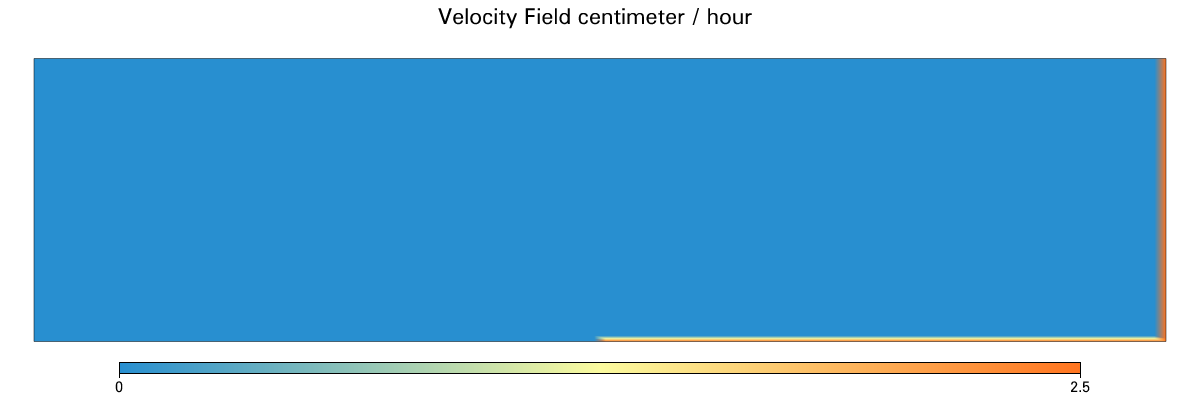

In [22]:
Fig = Model.plot.velocityField(figsize=(1200,400), units = u.centimetre / u.hour)

In [23]:
GEO.rcParams["solver"] = "mumps"
GEO.rcParams["penalty"] = 1e6

In [24]:
Model.run_for(0.2 * u.hours, checkpoint_interval=10 * u.minutes)

Running with UWGeodynamics version 0.7.0-dev-d5fcde4(master)
Step:1 Model Time:  0.00997832289707 hour dt: 0.00997832289707 hour (2018-09-07 02:14:46)
Step:2 Model Time:  0.0199586437574 hour dt: 0.00998032086032 hour (2018-09-07 02:14:50)
Step:3 Model Time:  0.0299395735031 hour dt: 0.00998092974572 hour (2018-09-07 02:14:54)
Step:4 Model Time:  0.0399219285526 hour dt: 0.00998235504953 hour (2018-09-07 02:14:57)
Step:5 Model Time:  0.0499061520589 hour dt: 0.00998422350622 hour (2018-09-07 02:15:01)
Step:6 Model Time:  0.0598932612193 hour dt: 0.00998710916039 hour (2018-09-07 02:15:05)
Step:7 Model Time:  0.0698831131949 hour dt: 0.00998985197563 hour (2018-09-07 02:15:09)
Step:8 Model Time:  0.0798745347824 hour dt: 0.00999142158755 hour (2018-09-07 02:15:13)
Step:9 Model Time:  0.0898676656945 hour dt: 0.0099931309121 hour (2018-09-07 02:15:16)
Step:10 Model Time:  0.0998621884544 hour dt: 0.00999452275983 hour (2018-09-07 02:15:20)
Step:11 Model Time:  0.109857739225 hour dt: 0.0

1


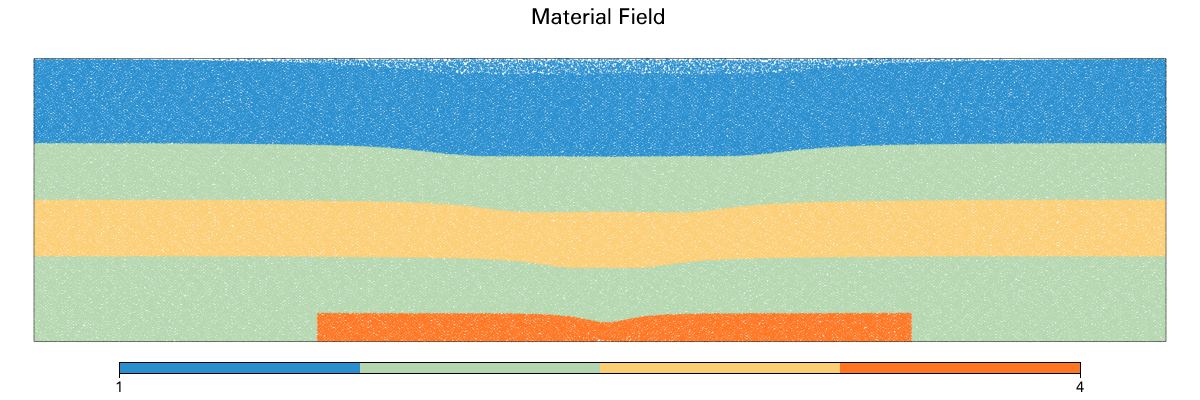

In [25]:
Fig = Model.plot.material(figsize=(1200,400), fn_size=2.)


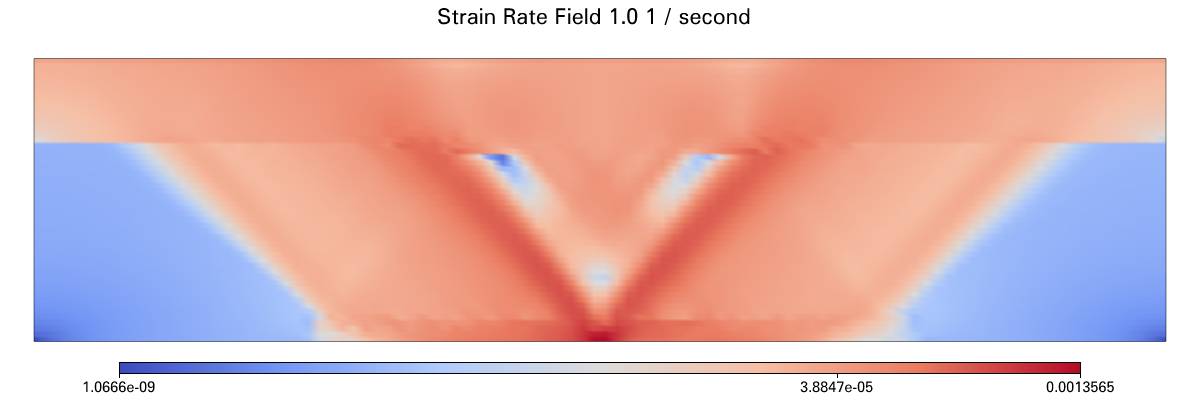

In [26]:
Fig = Model.plot.strainRate(onMesh=False, figsize=(1200,400), fn_size=2.)


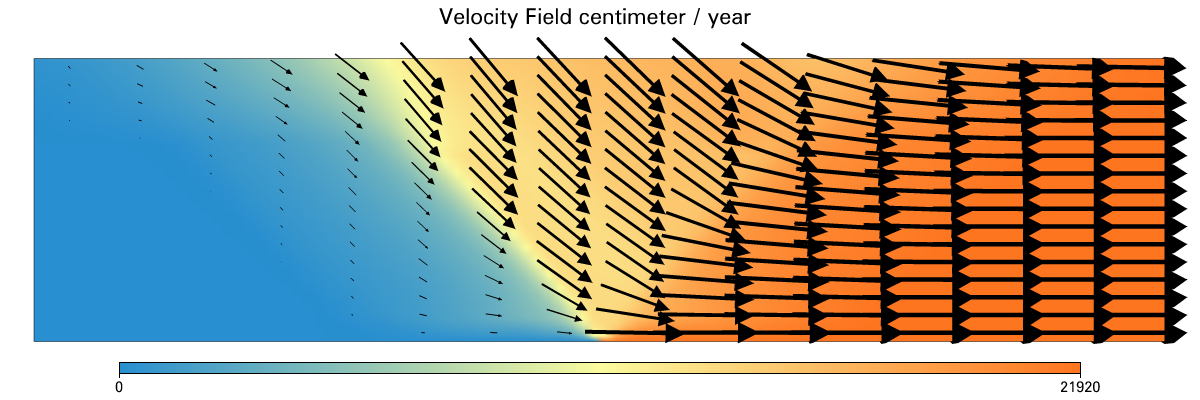

In [27]:
Fig = Model.plot.velocityField(onMesh=False, figsize=(1200,400), fn_size=2.)

In [28]:
Model.run_for(0.2 * u.hours, checkpoint_interval=10 * u.minutes)

Running with UWGeodynamics version 0.7.0-dev-d5fcde4(master)
Step:1 Model Time:  0.209997596309 hour dt: 0.00999759630898 hour (2018-09-07 02:19:02)
Step:2 Model Time:  0.219995058849 hour dt: 0.00999746254038 hour (2018-09-07 02:19:06)
Step:3 Model Time:  0.229992405111 hour dt: 0.00999734626158 hour (2018-09-07 02:19:10)
Step:4 Model Time:  0.239989635776 hour dt: 0.0099972306653 hour (2018-09-07 02:19:14)
Step:5 Model Time:  0.249986754804 hour dt: 0.00999711902791 hour (2018-09-07 02:19:18)
Step:6 Model Time:  0.259983669768 hour dt: 0.00999691496434 hour (2018-09-07 02:19:22)
Step:7 Model Time:  0.269980444164 hour dt: 0.00999677439592 hour (2018-09-07 02:19:25)
Step:8 Model Time:  0.279977174727 hour dt: 0.00999673056308 hour (2018-09-07 02:19:29)
Step:9 Model Time:  0.289973664723 hour dt: 0.00999648999559 hour (2018-09-07 02:19:33)
Step:10 Model Time:  0.29996991648 hour dt: 0.00999625175714 hour (2018-09-07 02:19:37)
Step:11 Model Time:  0.309966090917 hour dt: 0.0099961744368

1


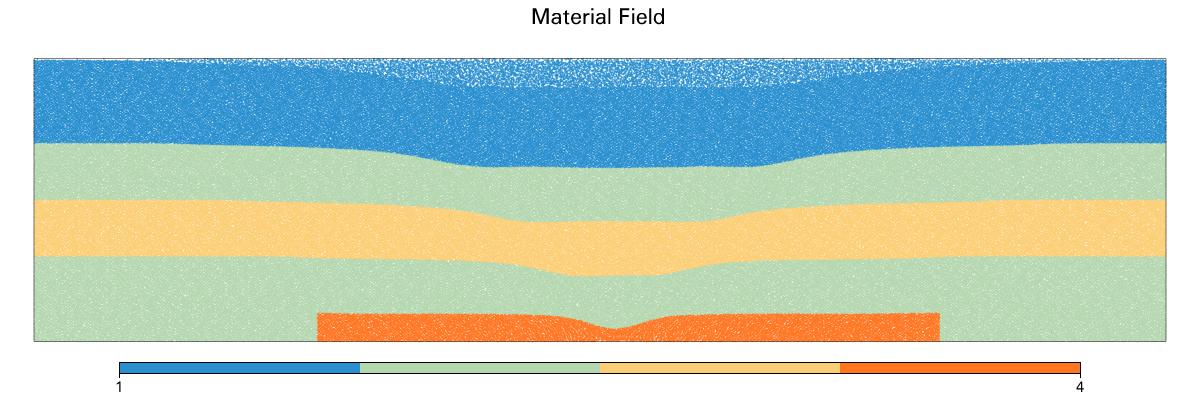

In [29]:
Fig = Model.plot.material(figsize=(1200,400), fn_size=2.)


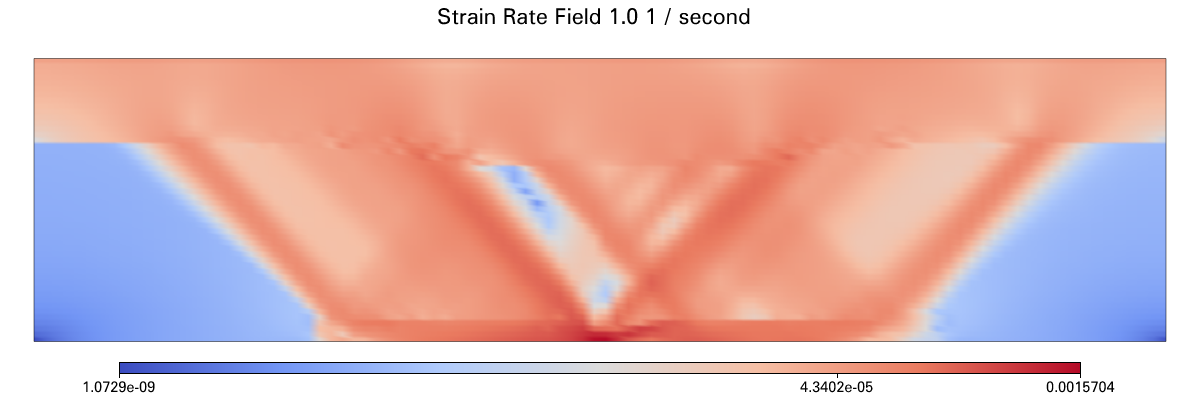

In [30]:
Fig = Model.plot.strainRate(onMesh=False, figsize=(1200,400), fn_size=2.)

In [31]:
Model.run_for(0.2 * u.hours, checkpoint_interval=10 * u.minutes)

Running with UWGeodynamics version 0.7.0-dev-d5fcde4(master)
Step:1 Model Time:  0.409961811298 hour dt: 0.00996181129773 hour (2018-09-07 02:23:23)
Step:2 Model Time:  0.419910338193 hour dt: 0.00994852689487 hour (2018-09-07 02:23:27)
Step:3 Model Time:  0.429862617321 hour dt: 0.00995227912852 hour (2018-09-07 02:23:30)
Step:4 Model Time:  0.439801462548 hour dt: 0.00993884522649 hour (2018-09-07 02:23:34)
Step:5 Model Time:  0.449732253605 hour dt: 0.00993079105736 hour (2018-09-07 02:23:38)
Step:6 Model Time:  0.45965256311 hour dt: 0.00992030950456 hour (2018-09-07 02:23:42)
Step:7 Model Time:  0.469580031606 hour dt: 0.00992746849671 hour (2018-09-07 02:23:45)
Step:8 Model Time:  0.479502302402 hour dt: 0.00992227079551 hour (2018-09-07 02:23:49)
Step:9 Model Time:  0.489430254447 hour dt: 0.00992795204487 hour (2018-09-07 02:23:53)
Step:10 Model Time:  0.499346692165 hour dt: 0.00991643771814 hour (2018-09-07 02:23:57)
Step:11 Model Time:  0.509263162251 hour dt: 0.009916470086

1


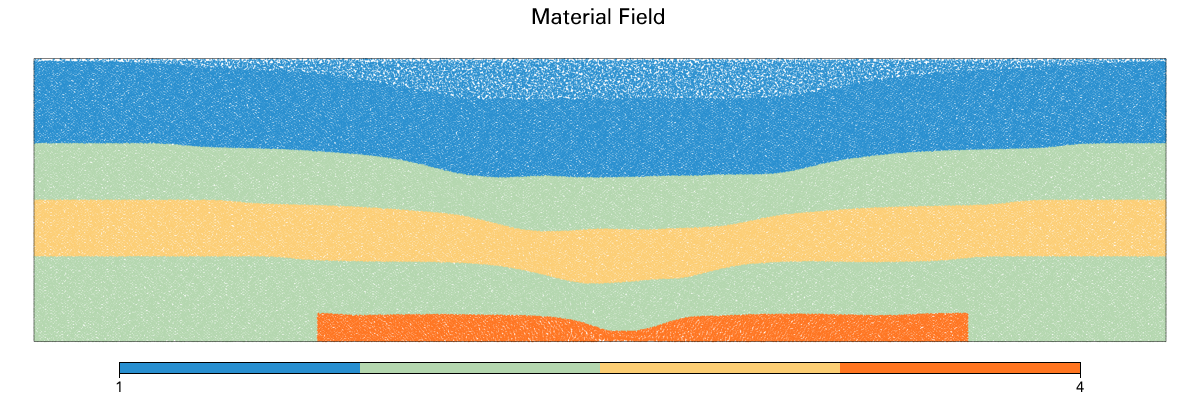

In [32]:
Fig = Model.plot.material(figsize=(1200,400), fn_size=2.)


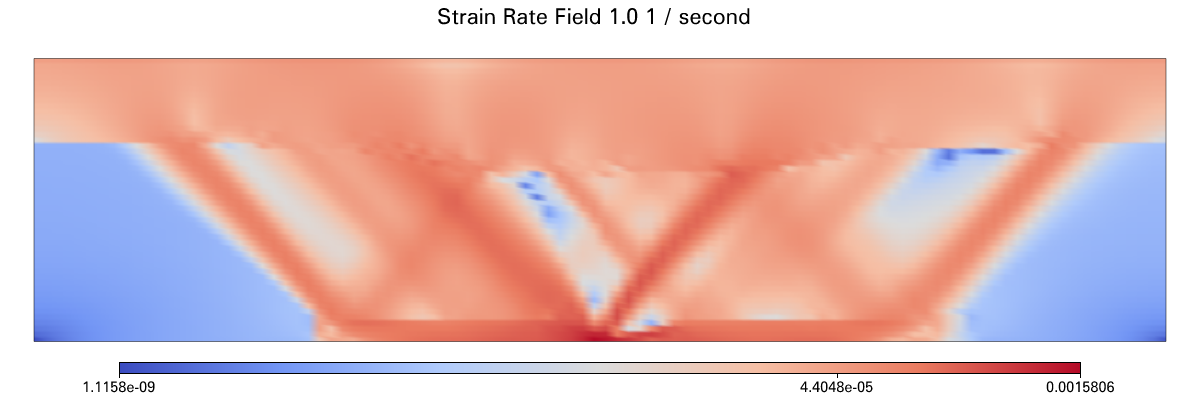

In [33]:
Fig = Model.plot.strainRate(onMesh=False, figsize=(1200,400), fn_size=2.)

In [34]:
Model.run_for(0.2 * u.hours, checkpoint_interval=10 * u.minutes)

Running with UWGeodynamics version 0.7.0-dev-d5fcde4(master)
Step:1 Model Time:  0.609921921142 hour dt: 0.00992192114172 hour (2018-09-07 02:26:07)
Step:2 Model Time:  0.619838402062 hour dt: 0.00991648092066 hour (2018-09-07 02:26:11)
Step:3 Model Time:  0.629757452144 hour dt: 0.00991905008197 hour (2018-09-07 02:26:15)
Step:4 Model Time:  0.639678279455 hour dt: 0.00992082731053 hour (2018-09-07 02:26:19)
Step:5 Model Time:  0.649597745817 hour dt: 0.00991946636229 hour (2018-09-07 02:26:23)
Step:6 Model Time:  0.659514407306 hour dt: 0.00991666148848 hour (2018-09-07 02:26:26)
Step:7 Model Time:  0.669429707207 hour dt: 0.00991529990166 hour (2018-09-07 02:26:30)
Step:8 Model Time:  0.679350119648 hour dt: 0.00992041244043 hour (2018-09-07 02:26:34)
Step:9 Model Time:  0.689277376299 hour dt: 0.00992725665081 hour (2018-09-07 02:26:38)
Step:10 Model Time:  0.699202420849 hour dt: 0.0099250445507 hour (2018-09-07 02:26:42)
Step:11 Model Time:  0.709119546976 hour dt: 0.009917126127

1


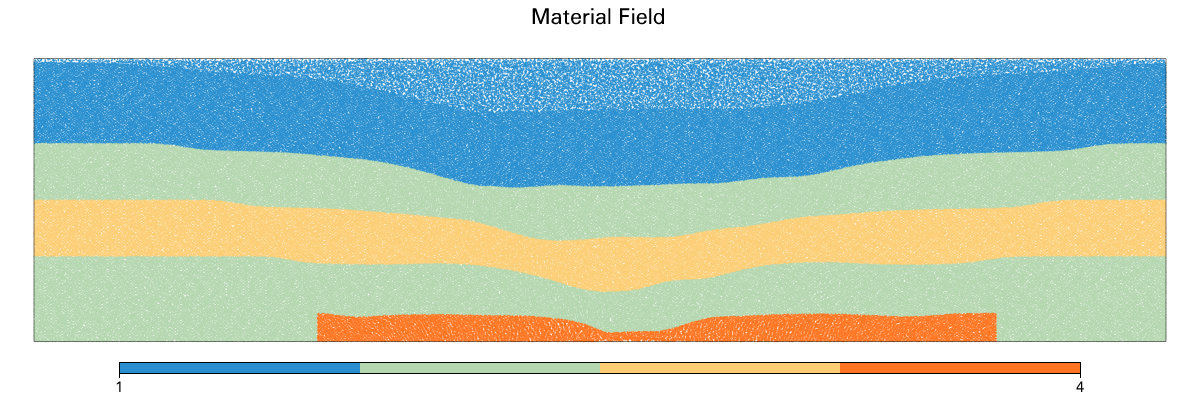

In [35]:
Fig = Model.plot.material(figsize=(1200,400), fn_size=2.)


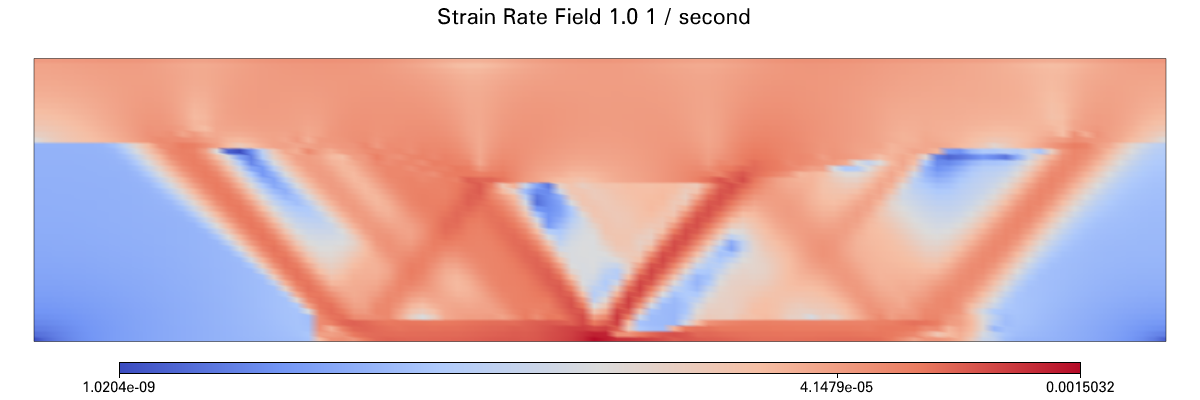

In [36]:
Fig = Model.plot.strainRate(onMesh=False, figsize=(1200,400), fn_size=2.)